# Modelos de regresion para predecir el precio de las casas en un area en específico

<img src="img\real.jpg" width="500"/>

La regresión es una de las herramientas estadísticas más comunmente usadas en machine learning. Nos permite hacer predicciones a partir de un grupo de datos, aprendiendo sobre las relaciones que existan entre las diferentes features (características o descriptores) y una variable observada que ofrece una respesta a cambios que se generen en las otras. Los modelos más comunes de regresión son:

1. **Regresión lineal**

2. **Árboles de decisión (Decision trees, CART)**

3. **Random forest regression**

# Exploratory Data Analysis (EDA)
El objetivo de un EDA es comprender el tipo de datos que están presentes en el DataFrame

* Tipo de variables (cualitativa o cuantitativa)
* Cuantitativas: variables descriptivas
* Cualitativas: categorías
* ¿Hay valores faltantes? ¿NaN?
* Determinar el tipo de distribución de las variables.

## Data Preprocessing - Data Wrangling

In [1]:
# Importando pandas y el archivo CSV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv("Datasets/final_data.csv")
df.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [2]:
for num,i in enumerate(df.columns):
    print (num,i,end="\t")
print("\n\n\nTotal de columnas:",len(df.columns))

0 Unnamed: 0	1 address	2 info	3 z_address	4 bathrooms	5 bedrooms	6 finishedsqft	7 lastsolddate	8 lastsoldprice	9 latitude	10 longitude	11 neighborhood	12 totalrooms	13 usecode	14 yearbuilt	15 zestimate	16 zindexvalue	17 zipcode	18 zpid	


Total de columnas: 19


---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------
De los datos, nos percatamos que existen varias características que no son necesarias para el presente análisis, como es el caso de "info", "z_addres", "zipcode" (ya que tenemos la variable "neighborhood), "zipid" y "zestimate"; siendo estos últimos dos relacionados con el precio estimado por Zillow.

In [3]:
df.drop(df.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


Verificando nuevamente los datos, observamos que la variable **zindexvalue** aparece como object. Pero al revisar el dataframe observamos que es de tipo numérica. Procedemos ha hacer el cambio de tipo de variable correspondiente:

In [4]:
# Primero hay que eliminar la coma separadora de valores:
df['zindexvalue'] = df['zindexvalue'].str.replace(',', '')
# Procedemos a hacer el cambio de tipo de variable:
df['zindexvalue'] = df['zindexvalue'].convert_objects(convert_numeric=True)
df.zindexvalue.dtypes

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


dtype('int64')

In [5]:
# Verificamos el rango de tiempo que cubre el DataFrame
df.lastsolddate.min(), df.lastsolddate.max()

('01/02/2013', '12/31/2015')

In [6]:
# Revisamos los parámetros descriptivos de las columnas numéricas del DataFrame:
df.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


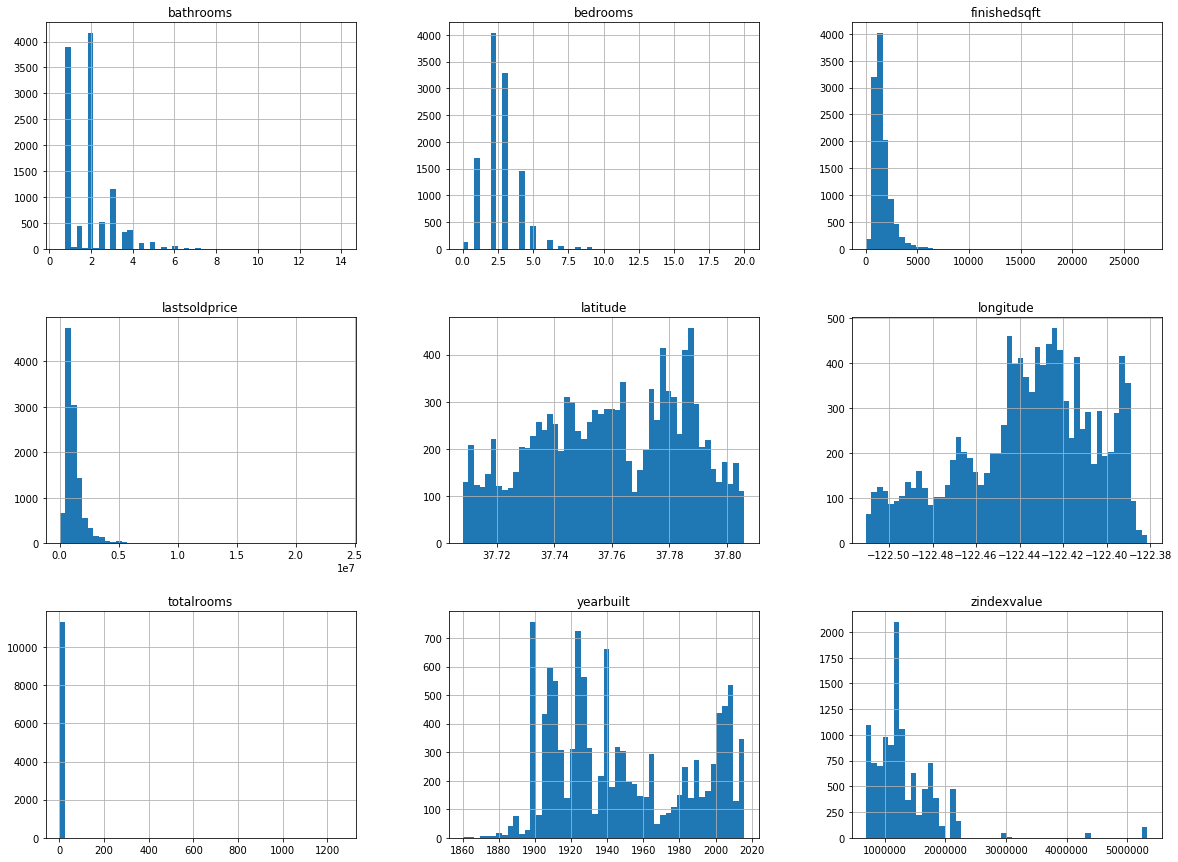

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("histograma_de_los_atributos")
plt.show()

Algunos de los histogramas parecen estar sesgados a la derecha. Sin embargo esto no es un resultado raro. Procederemos a hacer un diagrama de dispersión con respecto a la localización de las casas:

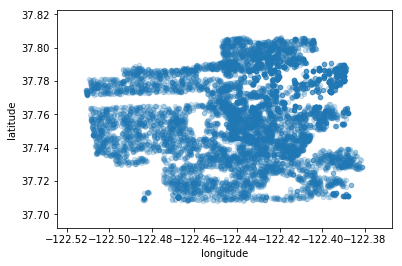

In [8]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

Se puede afirmar que las casas estan en una misma región distribuidas de manera uniforme. Para poder tener un mejor entendimiento de la gráfica, colorearemos los puntos de acuerdo al valor de la propiedad:

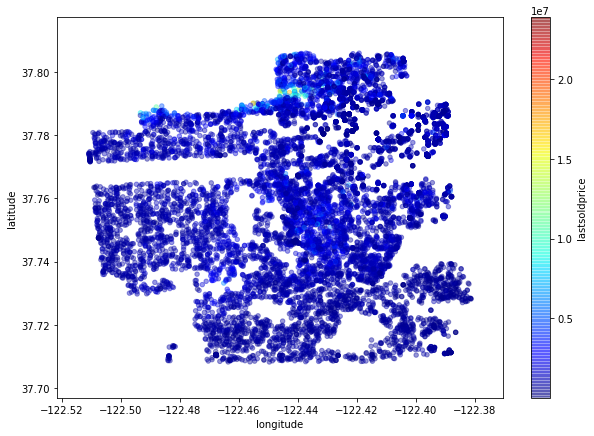

In [9]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", # Variable (categórica) que servirá para indicar los colores 
    cmap=plt.cm.jet, # Tipo de mapa de color deseado
    colorbar=True, # Muestra la escala de colores
    sharex=False) 

La imagen anterior nos dice que las casas mas caras fueron vendidas en una zona al norte de la región. A partir de este punto, la variable que vamos a predecir es el "last sold price". Para ello veamos que tanto se correlacionan el resto de las variables (independientes) con respecto a nuestra variable dependiente:

In [10]:
# Crearemos un dataframe donde solo se incluyan las correlaciones con respecto a
# las otras cacracterísticas:

corr_matrix = df.corr()
corr_matrix

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
bathrooms,1.000000,0.714270,0.719096,0.536880,0.041632,-0.120276,0.135171,-0.094791,0.249193
bedrooms,0.714270,1.000000,0.697461,0.395478,-0.157859,-0.258338,0.155320,-0.312583,0.164981
finishedsqft,0.719096,0.697461,1.000000,0.647208,0.061655,-0.208110,0.156913,-0.283712,0.338131
lastsoldprice,0.536880,0.395478,0.647208,1.000000,0.283107,-0.052595,0.093527,-0.189055,0.460429
latitude,0.041632,-0.157859,0.061655,0.283107,1.000000,0.117271,-0.007126,0.140987,0.393080
longitude,-0.120276,-0.258338,-0.208110,-0.052595,0.117271,1.000000,-0.054203,0.289189,-0.188348
totalrooms,0.135171,0.155320,0.156913,0.093527,-0.007126,-0.054203,1.000000,-0.061874,0.043554
yearbuilt,-0.094791,-0.312583,-0.283712,-0.189055,0.140987,0.289189,-0.061874,1.000000,-0.219629
zindexvalue,0.249193,0.164981,0.338131,0.460429,0.393080,-0.188348,0.043554,-0.219629,1.000000


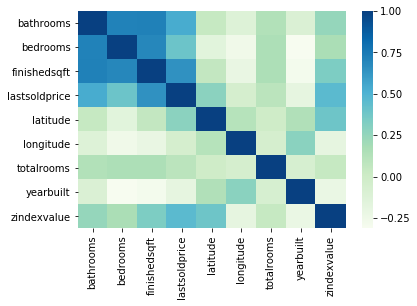

In [17]:
p1 = sns.heatmap(corr_matrix, cmap="GnBu")

Algunos ejemplos de los diferentes mapas de color que existen se presenta a continuación:

<img src="img\cmap.png" width="400"/>

In [18]:
# Las correlaciones para la columna de "lastsolprice" se 
# muestran por separado:

corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

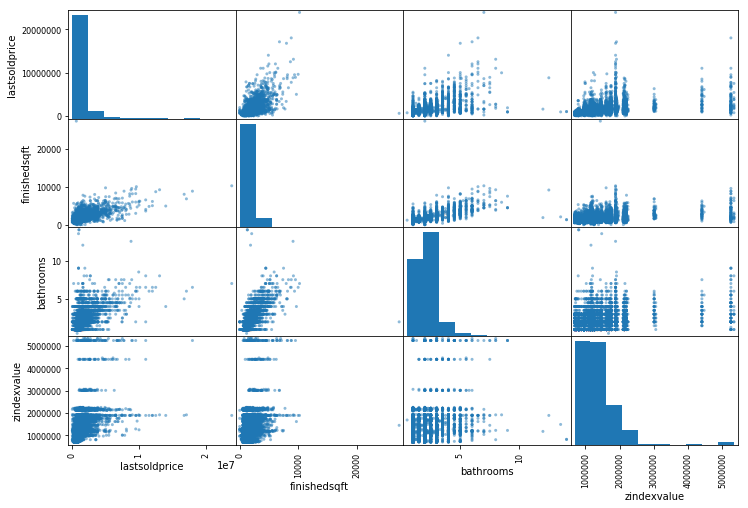

In [23]:
# Importamos la herramienta scatter matrix
from pandas.plotting import scatter_matrix
#Determinamos las columnas a considerar
attributes = ["lastsoldprice", "finishedsqft", "bathrooms", "zindexvalue"]
# Creamos el scatter matrix
scatter_matrix(df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

Los datos se muestran mas concentrados con la variable "finishedsqft".

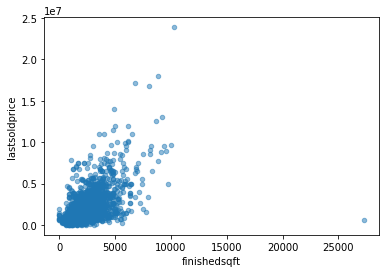

In [24]:
df.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)
plt.savefig('scatter.png')

Podemos afirmar que la correlación es bastante fuerte por 2 razones, la primera es que es posible observar una tendencia creciente, y la segunda es que los datos no están tan dispersos. Lo siguiente será calcular el precio del metro cuadrado por cada una de las casas.

In [25]:
df['price_per_sqft'] = df['lastsoldprice']/df['finishedsqft']
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

A pesar de que la nueva variable muestra una correlación muy baja con respecto al precio final, vamos a ocupar dicha variable para crear los diferentes grupos de vecindarios.

In [26]:
# Determinamos el número de vecindarios diferentes que hay.
len(df['neighborhood'].value_counts())

71

Procederemos a crear **3 grupos de vecindarios, los de menor precio, los de mayor precio pero baja frecuencia, y los de precio alto y alto nivel de frecuencia.**

In [27]:
# Determinamos la frecuencia de cada uno de los vecindarios
freq = df.groupby('neighborhood').count()['address']
freq

neighborhood
Bayview                                     354
Bernal Heights                              525
Buena Vista Park                             70
Central Richmond                            227
Central Sunset                              229
Central Waterfront - Dogpatch                58
Corona Heights                               90
Cow Hollow                                  175
Crocker Amazon                              129
Daly City                                     3
Diamond Heights                             123
Downtown                                    163
Eureka Valley - Dolores Heights - Castro    340
Excelsior                                   247
Forest Hill                                  65
Forest Hill Extension                        40
Glen Park                                   206
Golden Gate Heights                          65
Haight-Ashbury                              106
Hayes Valley                                262
Ingleside                  

In [28]:
# Determinamos el precio de pie cuadrado promedio por vecindario
mean = df.groupby('neighborhood').mean()['price_per_sqft']
mean

neighborhood
Bayview                                       417.049058
Bernal Heights                               3158.199830
Buena Vista Park                              952.912618
Central Richmond                              659.691461
Central Sunset                                610.067525
Central Waterfront - Dogpatch                 856.395529
Corona Heights                                967.902435
Cow Hollow                                   1226.036408
Crocker Amazon                                506.500691
Daly City                                     374.201197
Diamond Heights                               709.010359
Downtown                                      831.364250
Eureka Valley - Dolores Heights - Castro     1002.410856
Excelsior                                     567.028318
Forest Hill                                   716.081186
Forest Hill Extension                         749.322729
Glen Park                                     908.983786
Golden Gate Height

In [29]:
# Concatenamos ambos DataFrames en uno nuevo llamado cluster
# La concatenación se realiza de forma horizontal como lo muestra
# el argumento axis
cluster = pd.concat([freq, mean], axis=1)
cluster

,address,price_per_sqft
neighborhood,,
Bayview,354,417.049058
Bernal Heights,525,3158.199830
Buena Vista Park,70,952.912618
Central Richmond,227,659.691461
Central Sunset,229,610.067525
Central Waterfront - Dogpatch,58,856.395529
Corona Heights,90,967.902435
Cow Hollow,175,1226.036408
Crocker Amazon,129,506.500691


In [30]:
# Como la columna "neighbourhood se está usando como index,
# hay que moverla para que sea incluida en el DataFrame
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


In [32]:
# Usamos el segundo cuartil como límite para filtrar los datos
# y crear el cluster de precios bajos:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

In [33]:
# Creamos el segundo cluster
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

In [34]:
# Último cluster
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

In [35]:
# Creamos una función que nos indicará a que cluster corresponde cada
# valor del DataFrame original
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'

# Utilizamos el método apply, el cual ejecuta una función a una serie de datos
df['group'] = df.neighborhood.apply(get_group)

In [36]:
df.columns

Index(['address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue', 'price_per_sqft', 'group'],
      dtype='object')

Limpiamos nuevamente el DataFrame de aquellas columnas que no serán útiles en este ejercicio:
**'address', 'lastsolddate','latitude', 'longitude', 'neighborhood', 'price_per_sqft'**

In [37]:
df.drop(df.columns[[0, 4, 6, 7, 8, 13]], axis=1, inplace=True)
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms',
         'usecode', 'yearbuilt','zindexvalue', 'group', 'lastsoldprice']]
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,high_price_high_freq,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,high_price_high_freq,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,high_price_high_freq,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq,1530000.0


El último paso, es crear las variables dummy correspondientes para el manejo de las variables categóricas ("usecode", "group")

In [39]:
# Variables independientes
X = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 
        'usecode', 'yearbuilt', 'zindexvalue', 'group']]
# Variable dependiente
Y = df['lastsoldprice']

# Creación de variables dummy
n = pd.get_dummies(df.group)
m = pd.get_dummies(df.usecode)

# Agrgando las variables dummy a las variables independientes
X = pd.concat([X, n], axis=1)
X = pd.concat([X, m], axis=1)

# Eliminamos las variables categóricas originales ya que fueron
# sustituidas por las dummy
drops = ['group', 'usecode']
X.drop(drops, inplace=True, axis=1)
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,high_price_high_freq,high_price_low_freq,low_price,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,2007.0,975700,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,1,0,0,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600,1,0,0,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000,1,0,0,0,0,0,0,0,0,0,0,1,0


## Regresión lineal, Entrenando el modelo

Para este análisis será necesario utilizar la libreria de **scikit-learn**

In [41]:
# Esta herramienta nos ayudará a cear el grupo de entrenamiento y el de prueba
from sklearn.model_selection import train_test_split

# Instanciamos los grupos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [42]:
# La siguiente herramienta genera el modelo de regresión
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Métricas de la regresión

In [46]:
# Calculamos el valor R de correlación, valor óptimo = 1
y_pred = regressor.predict(X_test)
print("Valor de R cuadrada para la regresión lineal:", round(regressor.score(X_test, y_test),4))

Valor de R cuadrada para la regresión lineal: 0.5619


El valor de R cuadrada nos dice que solamente el 56.19% de la variabilidad en Y, puede ser explicada usando los parametros de X. Este valor es bajo para considerarlo una buena correlación. Procedemos a calcular la raiz del error cuadrático medio **(RMSE)**

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Se calcula el valor del error cuadrático medio, valor óptimo=0
lin_mse = mean_squared_error(y_pred, y_test)
# Se calcula el valor de la raiz del error cuadrático medio
lin_rmse = np.sqrt(lin_mse)
print("Valor de RMSE para la regresión lineal:", round(lin_rmse,4))

Valor de RMSE para la regresión lineal: 616071.5748


El modelo fue capaz de predecir el valor de cada casa en el grupo de prueba con un valor dentro de $616,071 con respecto al precio real.

In [48]:
# Calculamos el error absoluto medio (MAE)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Valor de MAE para la regresión lineal:", round(lin_mae,4))

Valor de MAE para la regresión lineal: 363742.1631


# Random Forest